# Uncernatinty and neural networks (but no Bayesian stuff)
In my small experiance I've noticed that Bayesian methods, even if extremly powerful, elegant and interesting to apply, have infact a weak point: **they do not scale with data... namely they are slow**.

In this small notebook I want to explore two ways to produce uncertainty estimates with neural networks with out using Bayesian methods. 

You will see how easy and fast it is to apply this methods, in particular using the NeuralNetModel class that I've developed and you can find in the repository:
https://github.com/clarkmaio/clarkpy

The two methods that I will explore are:
- **Quantile regression**
- **Ensemble of neural networks**





<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
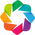

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
from bokeh.plotting import show
from datetime import datetime
from typing import Tuple

hv.extension('bokeh')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



from datasets import load_columbia_river
from ml.neuralnet import NeuralNetModel
from ml.loss import AveragePinballLoss, CRPSLoss, PinballLoss
from torch.nn import ReLU, Identity, LeakyReLU

## Data

In [2]:
raw_data = load_columbia_river()
raw_data.query('discharge_dellas > 0', inplace=True)
raw_data.query('year<=2016', inplace=True)

# Preprocess features
raw_data['sin_dayofyear'] = np.sin(2*np.pi*raw_data['dayofyear']/365)
raw_data['cos_dayofyear'] = np.cos(2*np.pi*raw_data['dayofyear']/365)
raw_data['weekday_class'] = raw_data['weekday'].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6:1})

# weekday one hot encode
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(raw_data['weekday_class'].values.reshape(-1, 1))
onehot_encoded = pd.DataFrame(onehot_encoded, columns=['weekday_class_0', 'weekday_class_1'], index=raw_data.index)
raw_data = pd.concat([raw_data, onehot_encoded], axis=1)

# Only usefull features
data = raw_data[['total_hydro_columbia', 'sin_dayofyear', 'cos_dayofyear', 'weekday_class_0', 'weekday_class_1', 'discharge_dellas']]
X = data[['sin_dayofyear', 'cos_dayofyear', 'weekday_class_0', 'weekday_class_1', 'discharge_dellas']]
y = data[['total_hydro_columbia']]

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Scale discharge_dellas
scaler = StandardScaler()
X_train['discharge_dellas'] = scaler.fit_transform(X_train[['discharge_dellas']])
X_test['discharge_dellas'] = scaler.transform(X_test[['discharge_dellas']])


# Scale target
scaler_y = StandardScaler()
y_train['total_hydro_columbia'] = scaler_y.fit_transform(y_train[['total_hydro_columbia']])
y_test['total_hydro_columbia'] = scaler_y.transform(y_test[['total_hydro_columbia']])


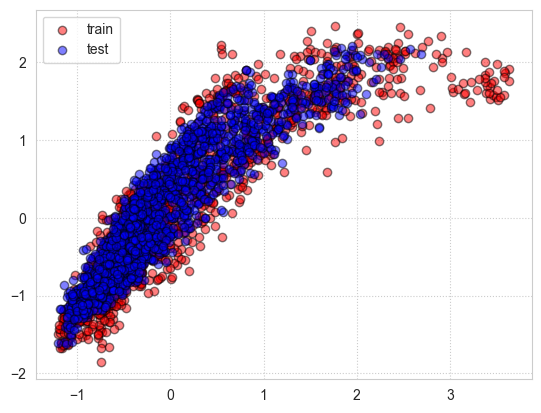

In [3]:
plt.scatter(X_train['discharge_dellas'], y_train['total_hydro_columbia'], color='red', alpha=0.5, edgecolors='black', label='train')
plt.scatter(X_test['discharge_dellas'], y_test['total_hydro_columbia'], color='blue', alpha=0.5, edgecolors='black', label='test')
plt.legend()
plt.grid(linestyle=':')

## Average quantile Loss
Let's start with the quantile regression. The idea is to train a neural network to predict the quantiles of the target distribution. In this way we can have a measure of the uncertainty of the prediction.

The formula of the loss function is:

$$
Loss = \frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{J}\rho_{\tau_j}(y_i - \hat{y}_{i, \tau_j})
$$

where $\rho_{\tau_j}(x) = \tau_j|x|$, $\tau_j$ is the $j$-th quantile and $\hat{y}_{i, \tau_j}$ is the $j$-th quantile of the prediction for the $i$-th sample.


**Note that we are not training a single model for each pinball loss, but we are training a single model to predict all the quantiles at the same time.**


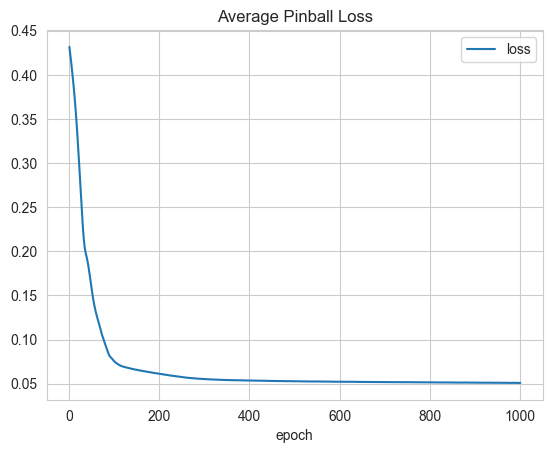

In [4]:
QUANTILES = [0.1, 0.5, 0.9]
model_quantile = NeuralNetModel(layers_units=[50, 50, 50, len(QUANTILES)],
                                activations=[LeakyReLU(), LeakyReLU(), LeakyReLU(), Identity()],
                                dropout_layers=None,
                                optimizer='Adam',
                                learning_rate=0.001,
                                loss=AveragePinballLoss(quantiles=QUANTILES),
                                epochs=1000,
                                batch_size=10000, verbose=False)
model_quantile.fit(X_train, y_train, shuffle=False)

model_quantile.loss_history.plot(title='Average Pinball Loss')
plt.show()

In [5]:
y_pred_quantile = model_quantile.predict(X_test)
y_pred_quantile = pd.DataFrame(y_pred_quantile, index=y_test.index, columns=QUANTILES)

# CRPS Loss
And now the CRPS Loss.

The formula of the loss function is:

$$
Loss = \frac{1}{N}\sum_{i=1}^{N}\int_{-\infty}^{+\infty}(F_{\hat{y}_i}(y) - F_{y_i}(y))^2dy
$$

where $F_{\hat{y}_i}(y)$ is the cumulative distribution function of the prediction for the $i$-th sample and $F_{y_i}(y)$ is the cumulative distribution function of the target for the $i$-th sample. 

It can actually been computed efficiently using the formula:

$$
Loss(y, \hat{y}) = \frac{1}{N} \sum_s \left( \frac{1}{M} \sum_i |\hat{y}_s(j) - y_s|  - \frac{1}{2M^2} \sum_{i,j} |\hat{y}_s(i) - \hat{y}_s(j)|\right)
$$

where $M$ is the number of ensemble members and $N$ is the number of samples and $\hat{y}_s(i)$ is the $s$-th prediction of the $i$-th ensemble member.


<Axes: title={'center': 'CRPS Loss'}, xlabel='epoch'>

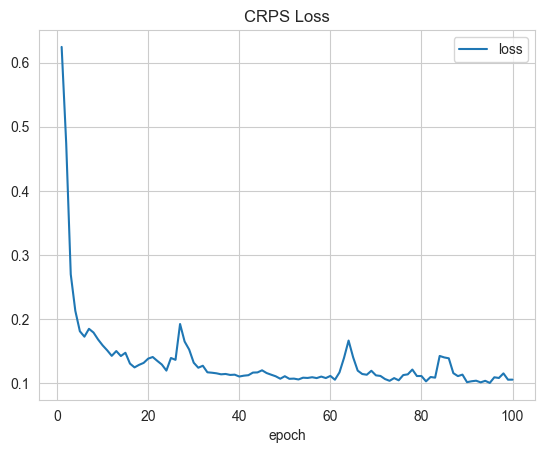

In [6]:
model_crps = NeuralNetModel(layers_units=[100, 50, 20, 1000],
                                 activations=[LeakyReLU(), LeakyReLU(), LeakyReLU(), Identity()],
                                 dropout_layers=None,
                                 optimizer='Adam',
                                 learning_rate=0.01,
                                 loss='crps',
                                 epochs=100,
                                 batch_size=512, verbose=False)
model_crps.fit(X_train, y_train, shuffle=False)
model_crps.loss_history.plot(title='CRPS Loss')


In [7]:
y_pred_crps = model_crps.predict(X_test)

# Organize prediction in a dataset and compute quantiles ex-post
y_pred_crps = pd.DataFrame(y_pred_crps, index=y_test.index)
y_pred_crps_quantile = y_pred_crps.quantile(QUANTILES, axis=1).T

## Comparison
Let's start with a visive comparison of the two methods.
Even if the second one is not directing optimising the quantiles loss I expect the prediction interval to be comparable. 

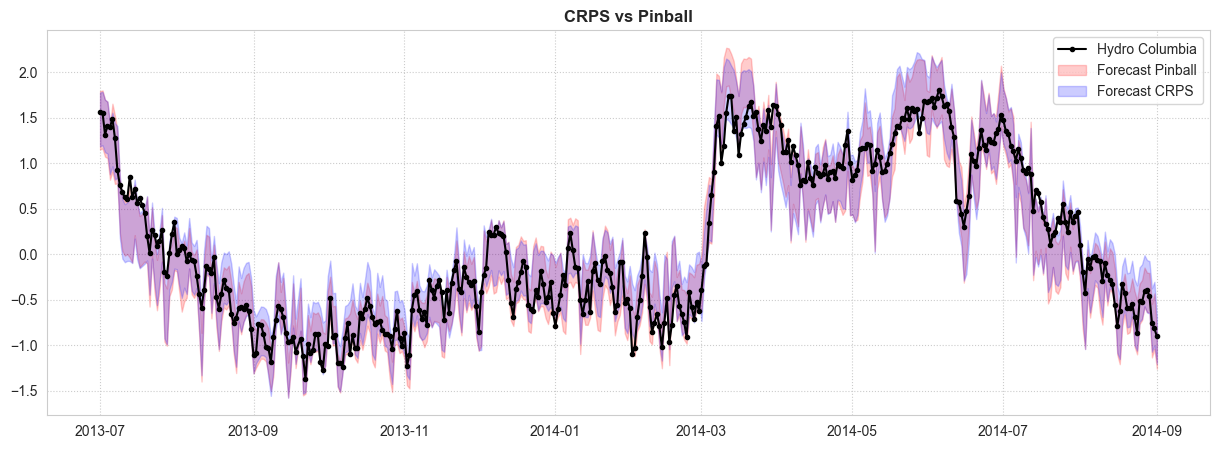

In [28]:
START, END = datetime(2013, 7, 1), datetime(2014, 9, 1)

plt.figure(figsize=(15, 5))
plt.plot(y_test.loc[START: END, 'total_hydro_columbia'], color='black', alpha=1, label='Hydro Columbia', marker='.')

plt.fill_between(x=y_pred_quantile.loc[START: END, :].index, y1=y_pred_quantile.loc[START: END, 0.1], y2=y_pred_quantile.loc[START: END, 0.9], 
                 color='red', alpha=0.2, label='Forecast Pinball')

plt.fill_between(x=y_pred_crps_quantile.loc[START: END, :].index, y1=y_pred_crps_quantile.loc[START: END, 0.1], y2=y_pred_crps_quantile.loc[START: END, 0.9], 
                 color='blue', alpha=0.2, label='Forecast CRPS')

plt.title('CRPS vs Pinball', fontweight='bold')
plt.legend()
plt.grid(linestyle=':')

I expect also 50% quantile to be aligned. It is somehow the deterministic representation of the two models.

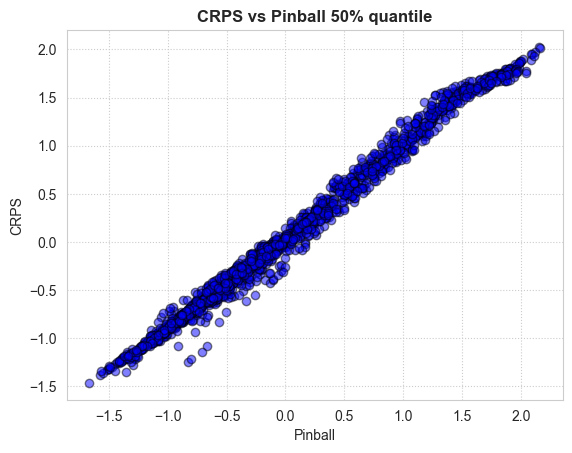

In [9]:
plt.scatter(y_pred_quantile[0.5], y_pred_crps_quantile[0.5], color='blue', alpha=0.5, edgecolors='black')
plt.xlabel('Pinball')
plt.ylabel('CRPS')
plt.title('CRPS vs Pinball 50% quantile', fontweight='bold')
plt.grid(linestyle=':')

## Quantile check
Let's check if the quantiles are well calibrated.
Namely if the actuals fall in the quantile interval **[10%, 90%]** 80% of the times.

To do this check we can count the occurencies of the actuals inside the prediction interval via bootstrap to obtain also an uncertainty measure of the result. 

In [10]:
# Bootstrap to compute the confidence interval of the quantiles
def bootsrap_quantile_check(y: pd.Series, y_low: pd.Series, y_high: pd.Series, n_batch: int =1000, batch_size: int = 1000) -> Tuple[float, float]:
    '''
    Extract batch_size from y_test, y_low and y_high. 
    Count how many times the y_test is inside the interval [y_low, y_high].
    Repeat the process n_samples_batch times.
    '''
    
    result = []
    for _ in range(n_batch):
        # Extract batch_size indexes
        idx = np.random.choice(y.index, size=batch_size, replace=False)
        
        # Extract correspondent values
        y_batch = y[idx]
        y_low_batch = y_low[idx]
        y_high_batch = y_high[idx]
        
        # Count how many times y_test is inside the interval [y_low, y_high]
        result.append(np.mean((y_batch >= y_low_batch) & (y_batch <= y_high_batch)))
    
    return np.mean(result), np.std(result)

In [11]:
mean, std = bootsrap_quantile_check(y=y_test['total_hydro_columbia'], y_low=y_pred_quantile[0.9], y_high=y_pred_quantile[0.1], n_batch=1000, batch_size=1000)
print(f'Pinball 80% confidence interval: {mean:.3f} +- {2*std:.3f}')

Pinball 80% confidence interval: 0.725 +- 0.018


In [12]:
mean, std = bootsrap_quantile_check(y=y_test['total_hydro_columbia'], y_low=y_pred_crps_quantile[0.1], y_high=y_pred_crps_quantile[0.9], n_batch=1000, batch_size=1000)
print(f'CRPS 80% confidence interval: {mean:.3f} +- {2*std:.3f}')

CRPS 80% confidence interval: 0.803 +- 0.016


## A cool thing you can do with CRPS
Ok, it could happen sometimes that CRPS is performing worse in term of Average Pinball Loss (it makes sense, at the end it is nott directly optimising it).
But I think that the model is still extremly valueable because the output for each sample is an ensemble of predictions that let us build the entire distribution of the prediction and make additional computation with that.

Quantile regression provide us at the end only few point of the CDF. 

Text(0.5, 1.0, "Forecast distribution 17/02/2014   :'(")

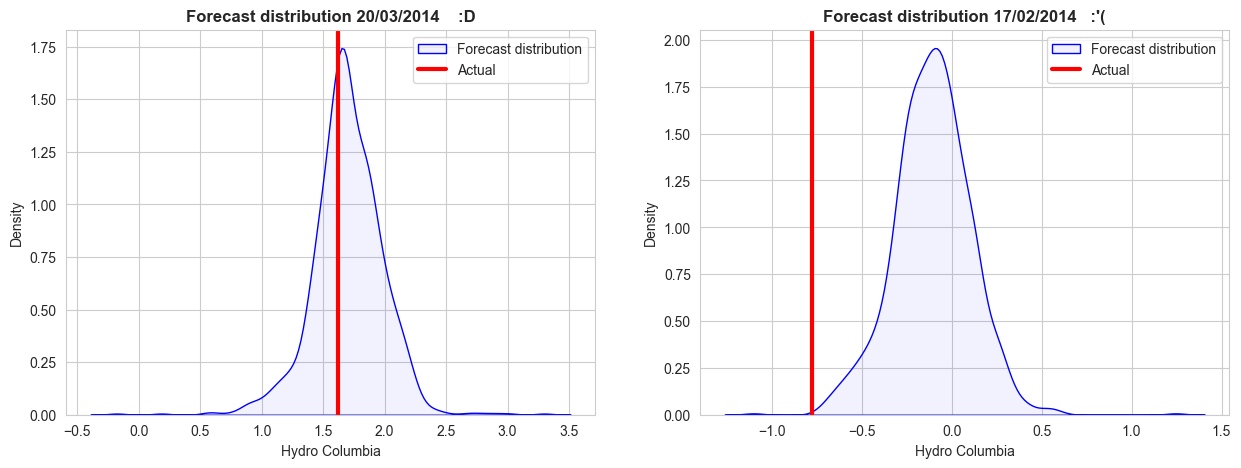

In [27]:
GOOD_DATE = datetime(2014, 3, 20)
BAD_DATE = datetime(2014, 2, 17)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(y_pred_crps.loc[GOOD_DATE, :], color='blue', label='Forecast distribution', fill=True, alpha=0.05, ax=ax[0])
ax[0].axvline(y_test.loc[GOOD_DATE, 'total_hydro_columbia'], color='red', label='Actual', linewidth=3)
ax[0].set_xlabel('Hydro Columbia')
ax[0].legend()
ax[0].set_title(f"Forecast distribution {GOOD_DATE.strftime('%d/%m/%Y')}    :D", fontweight='bold')


sns.kdeplot(y_pred_crps.loc[BAD_DATE, :], color='blue', label='Forecast distribution', fill=True, alpha=0.05, ax=ax[1])
ax[1].axvline(y_test.loc[BAD_DATE, 'total_hydro_columbia'], color='red', label='Actual', linewidth=3)
ax[1].set_xlabel('Hydro Columbia')
ax[1].legend()
ax[1].set_title(f"Forecast distribution {BAD_DATE.strftime('%d/%m/%Y')}   :'(", fontweight='bold')

An application to exploit the potential of model output could be the following. Suppose that an option is available on the market that pay you if the production of the hydro plant is above a certain threshold (**namely a call option on the production**).

At forecast time $t$ the payoff would be:

$$
\mathbb{E}(max(0, y_t - K)P_t)
$$

where $y_t$ is the forecasted production, $K$ is the strike value and $P$ is the price of energy per MWh.

I will suppose that $P_t$ is fixed and not stochastic (a.e. the derivative refer to price of auction of day ahead market).

Using our model we can actually easily price this option computing the expected value of the payoff using the distribution of the forecast.

$$
\mathbb{P} = \frac{1}{M} \sum_{i=1}^{M}max(0, \hat{y}_t^{(i)} - K)P_t
$$